In [52]:
import scipy
from scipy import stats, signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

## **HW 4**
#### **Problem 0**
Making 'fake' data

In [53]:
#Generating a time scale
t = np.linspace(0,np.pi*100,np.int(1e5))

#Creating an offset sin wave
N = 10+np.sin(t)

#Creating a background distribution that depends on N
bkgd = stats.norm.rvs(size = np.int(1e5))*np.sqrt(N)+N

#### **Problem 1**
##### **A)** Make a scatter plot of the first 1000 data points

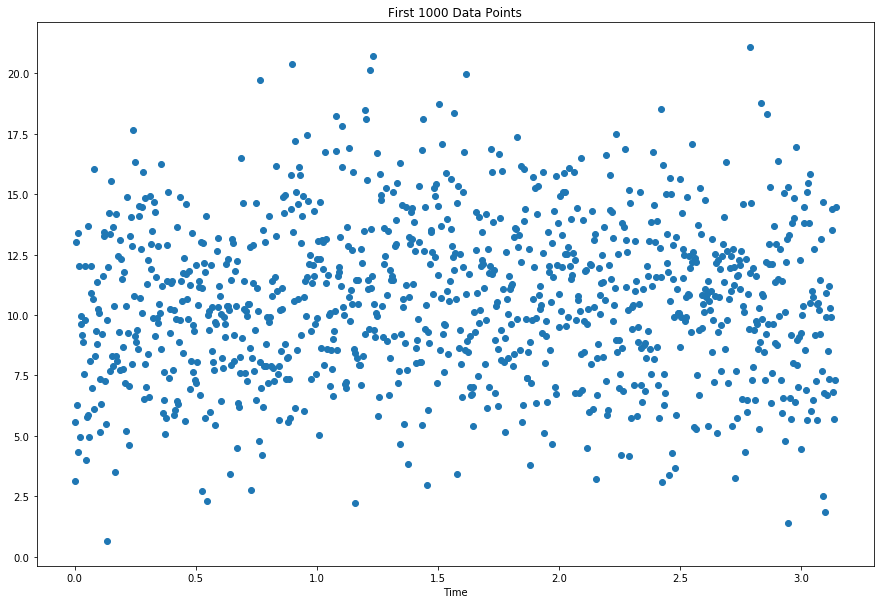

In [54]:
plt.plot(t[0:1001],bkgd[0:1001],'o')
plt.xlabel('Time')
plt.title('First 1000 Data Points')
plt.show()

##### **B)** Generalize your code so you can make a plot of any X contiguous points and produce an example plot of a set of data somethere in the middle of your array

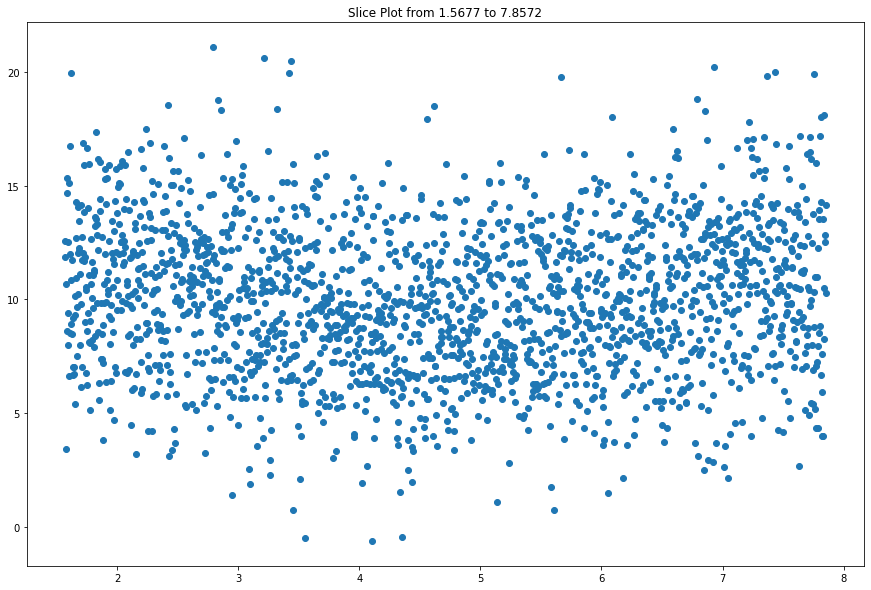

In [55]:
def slice_plt(x,y,start,length):
    plt.plot(t[start-1:start+length+1],bkgd[start-1:start+length+1],'o')
    plt.title('Slice Plot from ' + str(np.round(x[start-1],4)) + ' to ' + str(np.round(x[start+length+1],4)))
    plt.show()
slice_plt(t,bkgd,500,2000)

##### **C)** Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

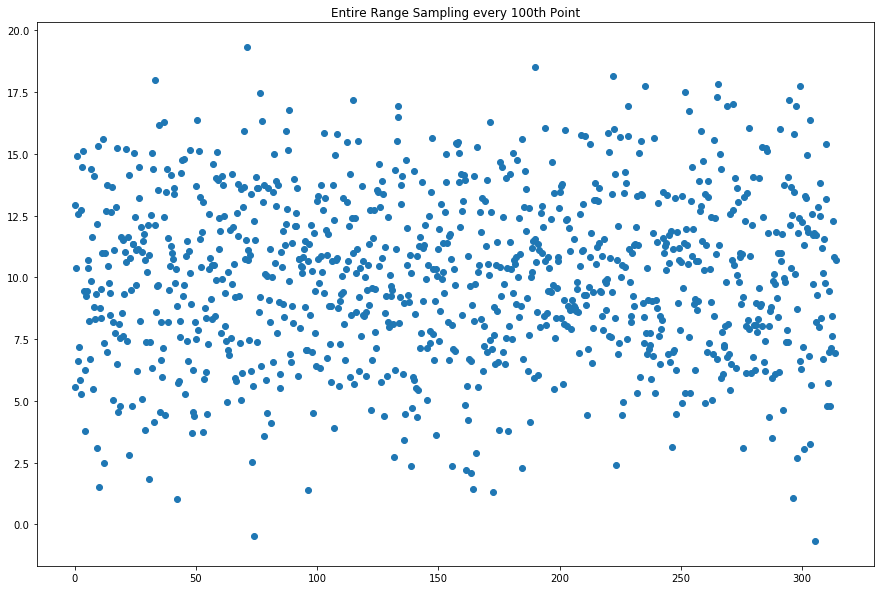

In [56]:
index = np.arange(0,np.int(1e5),100)
plt.plot(t[index],bkgd[index],'o')
plt.title('Entire Range Sampling every 100th Point')
plt.show()

#### **Problem 2**
##### **A)** Make a 2d histogram plot

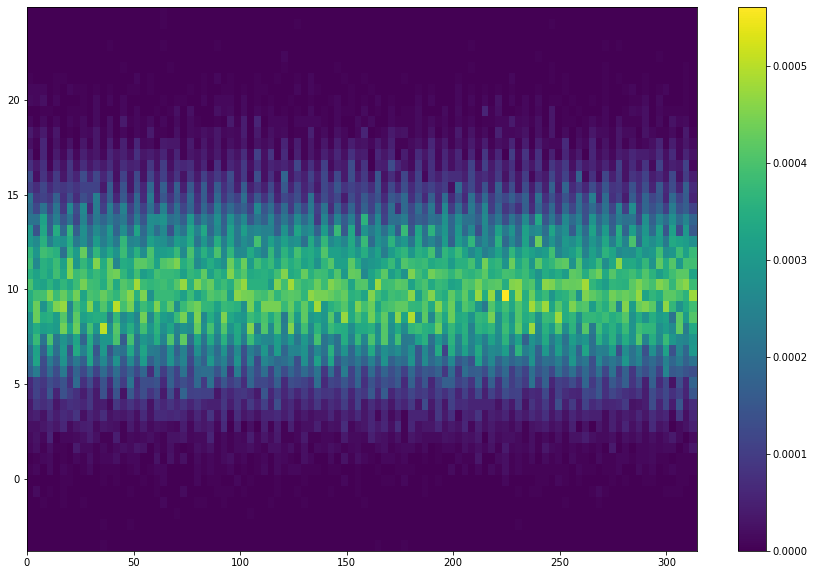

In [57]:
plt.hist2d(t,bkgd,bins = [100,50], density = True)
plt.colorbar()
plt.show()

##### **B)** Clearly explain what is being plotted in your plot

The plot above shows the probability density of getting a certain range of values in a certain range of time. The closer to yellow a region is the more likely that measurement is to occur.  The higher probability regions are mostly localized about the center of the plot at 10. They follow a roughly wavelike path about this center.

#### **Problem 3**
##### **A)** Make a scatter plot of all your data, but now folded.

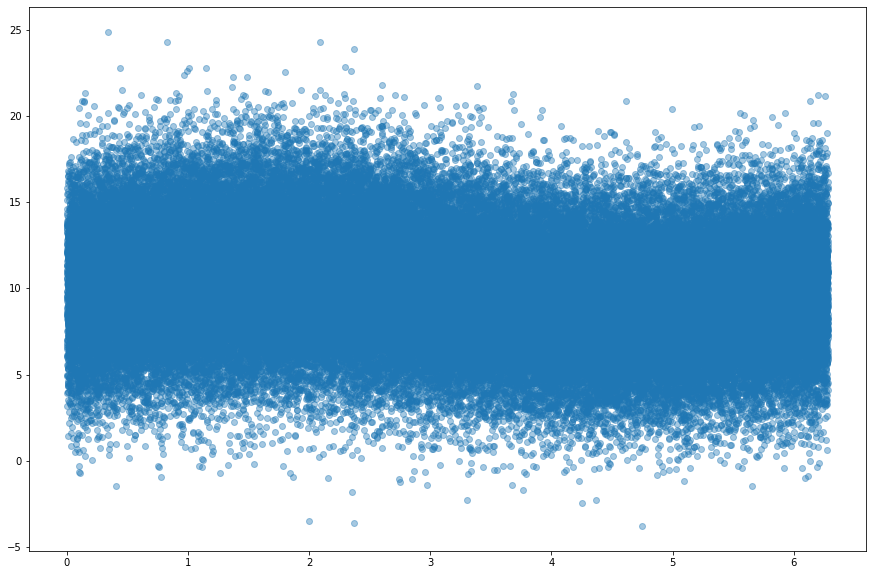

In [58]:
t2 = t%(2*np.pi)
plt.plot(t2,bkgd,'o',alpha=0.4)
plt.show()

##### **B)** Make a 2D histogram plot of your folded data

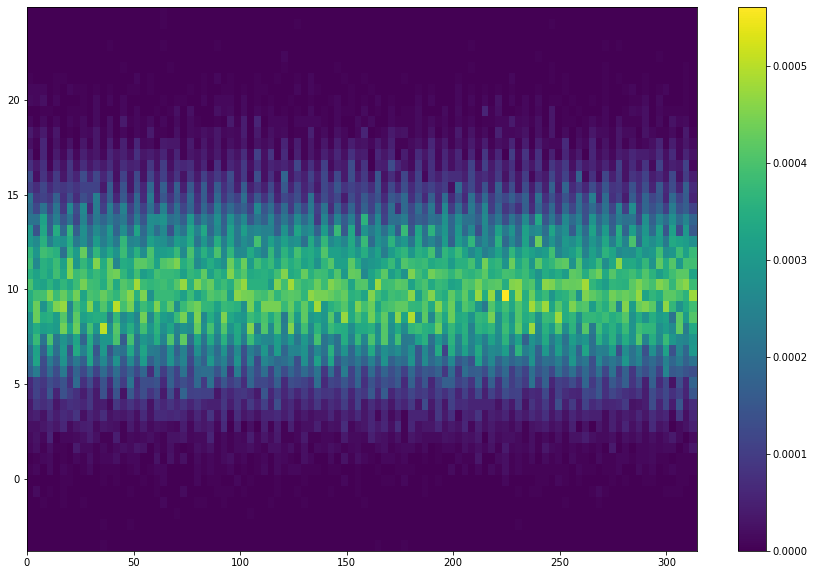

In [59]:
blocks = plt.hist2d(t,bkgd,bins = [100,50], density = True)
plt.colorbar()
plt.show()

##### **C)** Calculate the average as a function of the folded variable. You can then overplot this on the 2d histogram to show the average as a function of folded time.

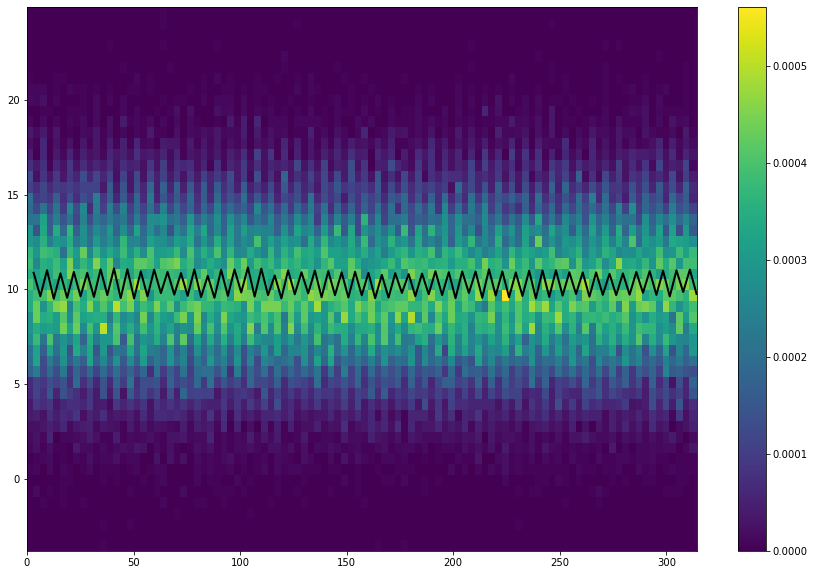

In [60]:
mean = np.zeros(100)
for i in range(0,100):
    mean[i] = sum(blocks[2][1:]*blocks[0][i,:]/sum(blocks[0][i,:]))
plt.hist2d(t,bkgd,bins = [100,50], density = True)
plt.plot(blocks[1][1:],mean, linewidth = 2, color = 'black')
plt.colorbar()
plt.show()